### Fitting Mathias Copeman variables

Adjust the Mathias Coppeman parameters from the dippr101 equation for saturation pressure

## GUARDAAA: ReidIdeal parameters must be alredy seted

In [2]:
import numpy as np

import matplotlib.pyplot as plt

import psrk

In [6]:
# COMPLETE ALL THIS
substance_name = "limonene"
a, b, c, d, e = (7.5574e01, -8079.7, -7.5596, 8.3872e-18, 6.0000e00)

# fill t_min and t_max fiven in DIPPR 2003 (used to test the dippr101 func)
t_min, t_max = (198.8, 653)
psat_min, psat_max = (0.0062479, 2822000)

# temperature range and temperature interval numb for optimization
temperature_range = np.array([20 + 273.15, 100 + 273.15])
temperature_intervals_num = 100

# Guess of the mathias copeman coeffs
c_guess = np.array([1, -1.0, 3.0])

In [7]:
def dippr101(temperature):
    """dippr101 equation for vapor pressure."""
    t = temperature
    # =========================================================================
    # Parameters of the 101 DIPPR equation (complete de values)
    # =========================================================================

    p_sat = np.exp(a + b / t + c * np.log(t) + d * t**e)

    return p_sat

In [8]:
# =============================================================================
# test the dippr101 with the max and min value given by DIPPR 2003
# =============================================================================

print(
    f"""
    DIPPR_value       Func_value                      difference
    {psat_min}    {dippr101(t_min)}       {np.abs(psat_min - dippr101(t_min))}
    {psat_max}    {dippr101(t_max)}       {np.abs(psat_max - dippr101(t_max))}
    """
)


    DIPPR_value       Func_value                      difference
    0.0062479    0.006247948400082917       4.840008291720488e-08
    2822000    2821960.65007065       39.34992934996262
    


# Run Optimization

In [9]:
# =============================================================================
# optimization of the parameters
# ============================================================================

result = psrk.mathias_copeman_optim(
    substance=substance_name,
    sat_pressure_func=dippr101,
    temperature_range=temperature_range,
    temperature_intervals_num=temperature_intervals_num,
    c_guess=c_guess,
    method="Nelder-Mead",
    tol=1e-5,
    max_func_eval=2000,
)

In [10]:
print("guess used:")
print(c_guess)

print("result:")
print(result.x)

print("optimization result:")
result

guess used:
[ 1. -1.  3.]
result:
[ 1.11437714 -0.62643454  1.06065681]
optimization result:


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 36.884282664591865
             x: [ 1.114e+00 -6.264e-01  1.061e+00]
           nit: 180
          nfev: 330
 final_simplex: (array([[ 1.114e+00, -6.264e-01,  1.061e+00],
                       [ 1.114e+00, -6.264e-01,  1.061e+00],
                       [ 1.114e+00, -6.264e-01,  1.061e+00],
                       [ 1.114e+00, -6.264e-01,  1.061e+00]]), array([ 3.688e+01,  3.688e+01,  3.688e+01,  3.688e+01]))

### Testing the adjust result

In [17]:
# =============================================================================
# Model construction
# =============================================================================
(
    c1,
    c2,
    c3,
) = result.x  # ¡GUARDAAAAAAAA AVECES USO C_GUESS ACA CAMBIAR POR result.x!
csv_data_mc = f"""Clapeyron Database File,,,,,
                        MathiasCopemanAlpha like Parameters,,,,,
                        species,c1,c2,c3
                        {substance_name},{c1},{c2},{c3}
        """
model = psrk.PSRK(
    substances=[substance_name],
    pure_temperature=None,
    pure_pressure=None,
    alpha_userlocations=[csv_data_mc],
)

# RESULTS IN ALLTEMPERATURE RANGE

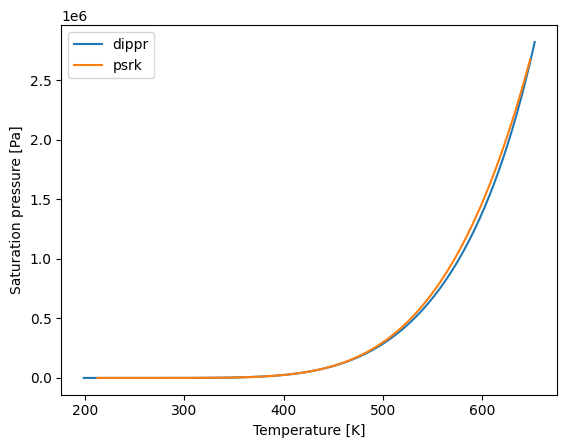

In [18]:
# All temperature range
temperatures = np.linspace(t_min, t_max, 100)

dippr_pressures = dippr101(temperatures)
psrk_pressures1 = np.array([])
for idx, t in enumerate(temperatures):
    psat = model.saturation_pressure(t, dippr_pressures[idx])[0]
    psrk_pressures1 = np.append(psrk_pressures1, psat)

plt.plot(temperatures, dippr_pressures)
plt.plot(temperatures, psrk_pressures1)

plt.legend(["dippr", "psrk"])

plt.ylabel("Saturation pressure [Pa]")
plt.xlabel("Temperature [K]")

plt.show()

max absolute diference
nan


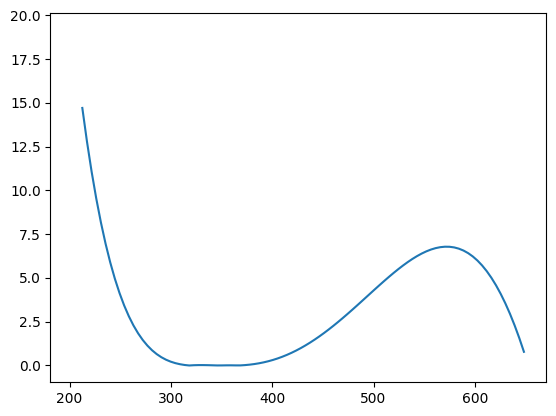

In [19]:
# Max difference betwen DIPPR and PSRK

diferences = np.abs(dippr_pressures - psrk_pressures1)

print("max absolute diference")
print(np.max(diferences))
# Graphic whit welative errors

relative_errors = np.divide(diferences, dippr_pressures) * 100

plt.plot(temperatures, relative_errors)

# RESULTS IN OPTIMIZATION TEMPERATURE RANGE

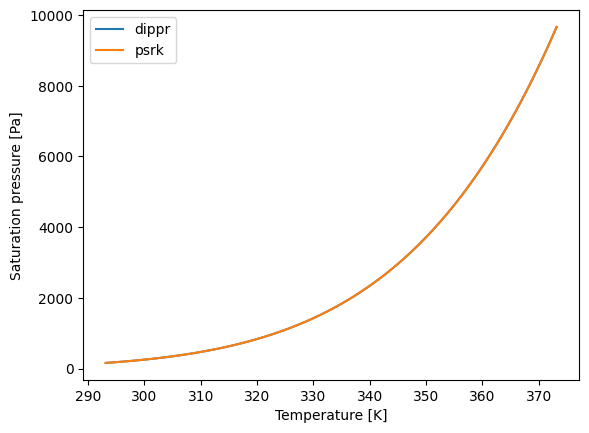

In [20]:
# In optimization temperature range
temperatures = np.linspace(temperature_range[0], temperature_range[1], 100)

dippr_pressures = dippr101(temperatures)
psrk_pressures2 = np.array([])
for idx, t in enumerate(temperatures):
    psat = model.saturation_pressure(t, dippr_pressures[idx])[0]
    psrk_pressures2 = np.append(psrk_pressures2, psat)

plt.plot(temperatures, dippr_pressures)
plt.plot(temperatures, psrk_pressures2)

plt.legend(["dippr", "psrk"])

plt.ylabel("Saturation pressure [Pa]")
plt.xlabel("Temperature [K]")

plt.show()

In [21]:
# Max difference betwen DIPPR and PSRK

diferences = np.abs(dippr_pressures - psrk_pressures2)

print("max absolute diference")
print(np.max(diferences))

max absolute diference
2.176497290187399


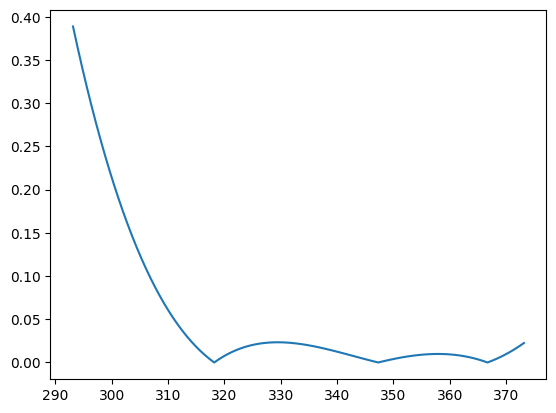

In [22]:
# Graphic whit welative errors

relative_errors = np.divide(diferences, dippr_pressures) * 100

plt.plot(temperatures, relative_errors)

In [23]:
# error at 303.15 K
psat303 = dippr101(303.15)
psat_psrk303 = model.saturation_pressure(303.15, psat303)[0]

np.abs(psat303 - psat_psrk303) / psat303 * 100

0.15450547296754663